In [633]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

import warnings
warnings.filterwarnings("ignore")

# Understanding train dataset

In [787]:
df_train = pd.read_csv('train.csv')
df_train.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [635]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [636]:
df_train.describe()

,customer_id,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,10147.000000,10147.000000,10147.000000,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000
mean,311272.276831,63.172366,0.412634,1.0,0.563024,0.119838,0.212181,0.787819,0.568444
std,106781.701016,19.232595,0.492332,0.0,0.496037,0.324788,0.408872,0.408872,0.495318
min,123472.000000,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221439.000000,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,310062.000000,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,401537.000000,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,499988.000000,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [637]:
df_train.describe(include=object)

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,84,10059,9975,10025,10050,9999
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Bachelors degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,5045,5802,8015,2576,3191,5643,5204,2133,4086,3511,1485,1622,18,4150,2696,3741,4296,4889


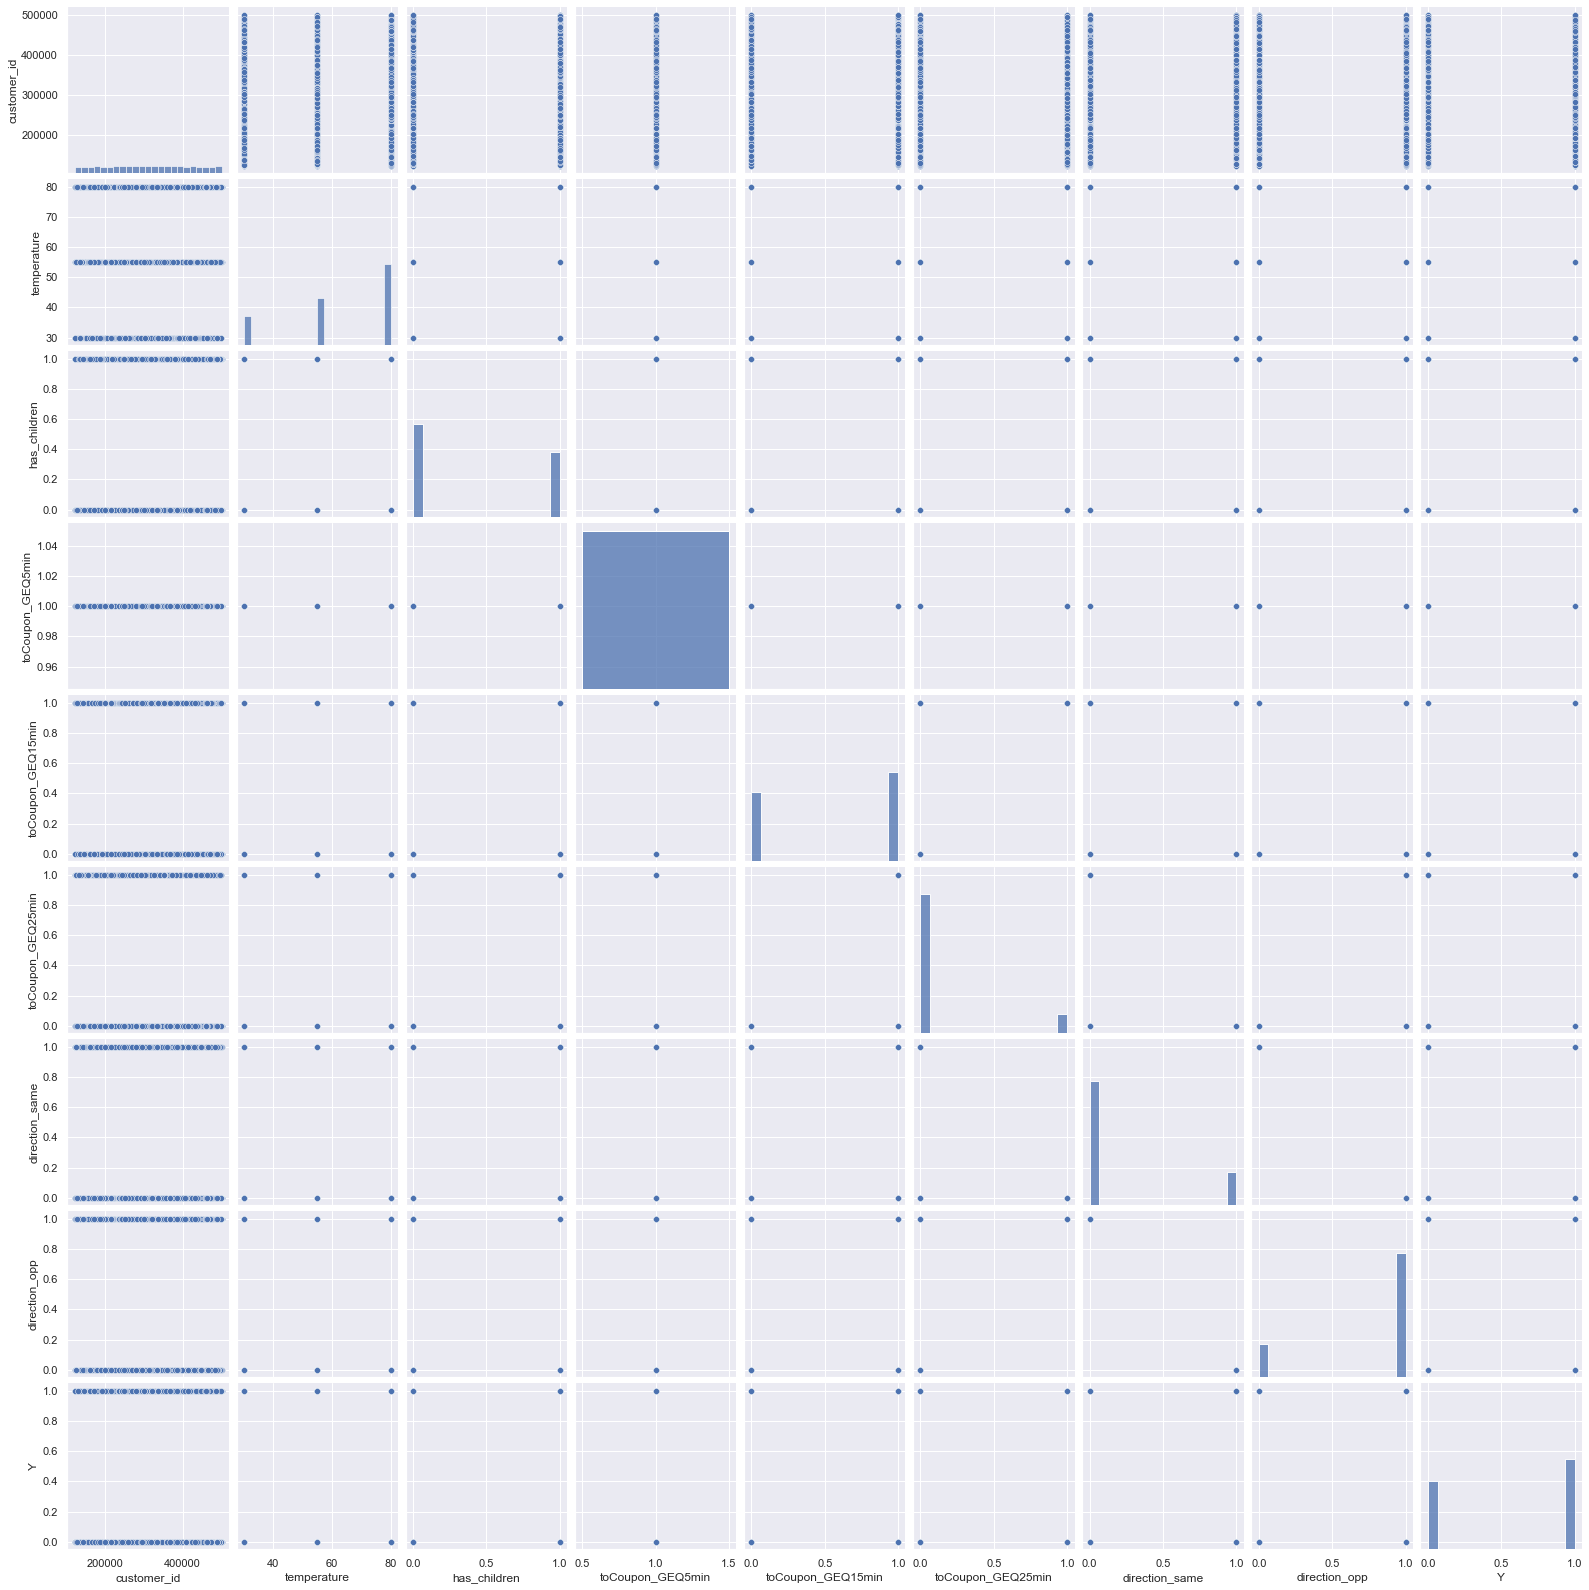

In [783]:
#checking linear correlation
sns.pairplot(df_train)

In [638]:
df_train.isnull().sum()

customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [639]:
# Unique values count will help in understanding if the columns are categorical or numerical
df_train.nunique()

customer_id             10147
destination                 3
passanger                   4
weather                     3
temperature                 3
time                        5
coupon                      5
expiration                  2
gender                      2
age                         8
maritalStatus               5
has_children                2
education                   6
occupation                 25
income                      9
car                         5
Bar                         5
CoffeeHouse                 5
CarryAway                   5
RestaurantLessThan20        5
Restaurant20To50            5
toCoupon_GEQ5min            1
toCoupon_GEQ15min           2
toCoupon_GEQ25min           2
direction_same              2
direction_opp               2
Y                           2
dtype: int64

In [640]:
# Count of all distinct values of each column
for col in df_train.columns:
    if col != 'customer_id':
        print("=======", col, "=======")
        print(df_train[col].value_counts())

======= destination =======
No Urgent Place    5045
Home               2572
Work               2530
Name: destination, dtype: int64
======= passanger =======
Alone        5802
Friend(s)    2676
Partner       855
Kid(s)        814
Name: passanger, dtype: int64
======= weather =======
Sunny    8015
Snowy    1142
Rainy     990
Name: weather, dtype: int64
======= temperature =======
80    5203
55    3058
30    1886
Name: temperature, dtype: int64
======= time =======
6PM     2576
7AM     2530
10AM    1833
2PM     1616
10PM    1592
Name: time, dtype: int64
======= coupon =======
Coffee House             3191
Restaurant(<20)          2233
Carry out & Take away    1923
Bar                      1623
Restaurant(20-50)        1177
Name: coupon, dtype: int64
======= expiration =======
1d    5643
2h    4504
Name: expiration, dtype: int64
======= gender =======
Female    5204
Male      4943
Name: gender, dtype: int64
======= age =======
21         2133
26         2033
31         1636
50plus     143

In [641]:
# Convert age column to numerical column
#df_train['age'] = df_train['age'].apply(lambda x : 51 if x == '50plus' else x)
#df_train['age'] = df_train['age'].apply(lambda x : 20 if x == 'below21' else x)
#df_train['age'] = pd.to_numeric(df_train['age'])
#df_train.info()

# Cleaning up or Preprocessing train dataset

In [790]:
# Setting customer_id as index of the dataframe
data_train = df_train.set_index('customer_id')

<AxesSubplot:ylabel='direction_opp'>

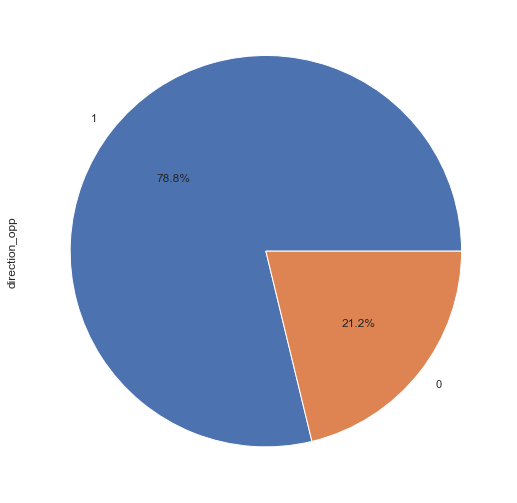

In [791]:
# Dropping direction_opp as around 80% of data is one category and prediction may get biased 
data_train.direction_opp.value_counts().plot.pie(autopct='%1.1f%%')

In [792]:
# Dropping car column as it has 10063 records with Null values
# Dropping direction_opp column as it represents same data as direction_same
# Dropping toCoupon_GEQ5min as it has same value for all rows
data_train.drop(columns=['car','direction_opp','toCoupon_GEQ5min'], inplace=True)

In [644]:
data_train.shape

(10147, 23)

In [794]:
# Filling in the missing values
# Bar                        88
# CoffeeHouse               172
# CarryAway                 122
# RestaurantLessThan20       97
# Restaurant20To50          148
data_train.fillna({"Bar":data_train['Bar'].mode()[0], \
             "CoffeeHouse":data_train['CoffeeHouse'].mode()[0], \
             "CarryAway":data_train['CarryAway'].mode()[0], \
             "RestaurantLessThan20":data_train['RestaurantLessThan20'].mode()[0], \
             "Restaurant20To50":data_train['Restaurant20To50'].mode()[0]}, inplace=True)

In [646]:
data_train.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

In [647]:
data_train.shape

(10147, 23)

In [648]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10147 entries, 258868 to 431162
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           10147 non-null  object
 1   passanger             10147 non-null  object
 2   weather               10147 non-null  object
 3   temperature           10147 non-null  int64 
 4   time                  10147 non-null  object
 5   coupon                10147 non-null  object
 6   expiration            10147 non-null  object
 7   gender                10147 non-null  object
 8   age                   10147 non-null  object
 9   maritalStatus         10147 non-null  object
 10  has_children          10147 non-null  int64 
 11  education             10147 non-null  object
 12  occupation            10147 non-null  object
 13  income                10147 non-null  object
 14  Bar                   10147 non-null  object
 15  CoffeeHouse           10147 no

# Pareto Analysis

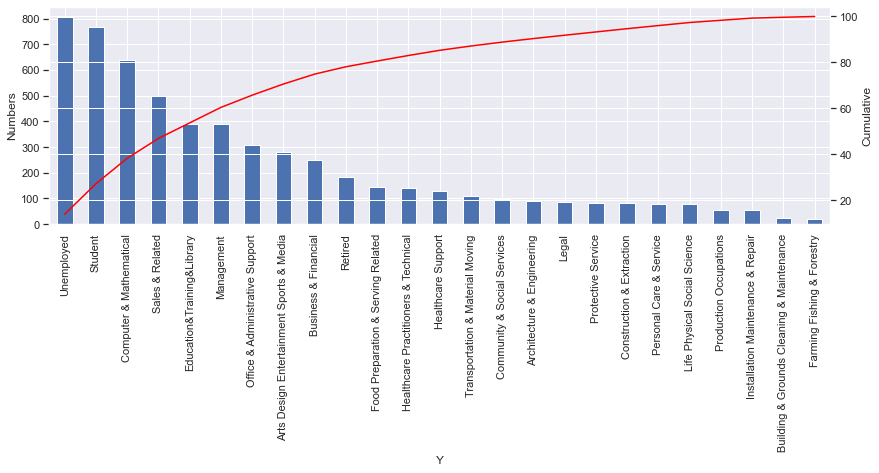

In [795]:
# Pareto Analysis on Occupation column as it has 25 categorical values

occupation_p = data_train.groupby(['occupation'])['Y'].sum()
occupation_cum_perc = occupation_p.sort_values(ascending=False).cumsum() / occupation_p.sum() * 100

fig, axis1 = plt.subplots(figsize=(14,4))
axis2 = axis1.twinx()
occupation_cum_perc.plot.line(ax=axis2, color= 'red')
occupation_p.sort_values(ascending=False).plot.bar(ax=axis1)
axis1.set_xlabel(occupation_p.name)
axis1.set_ylabel('Numbers')
axis2.set_ylabel('Cumulative')
    
important_occupation = occupation_cum_perc[occupation_cum_perc < 80]

In [796]:
data_train['occupation']=data_train['occupation'].apply(lambda x : 'Others' if x not in important_occupation else x)

In [797]:
data_train.occupation.value_counts()

Others                                      2122
Unemployed                                  1485
Student                                     1245
Computer & Mathematical                     1111
Sales & Related                              896
Education&Training&Library                   753
Management                                   665
Arts Design Entertainment Sports & Media     526
Office & Administrative Support              517
Business & Financial                         433
Retired                                      394
Name: occupation, dtype: int64

<AxesSubplot:ylabel='occupation'>

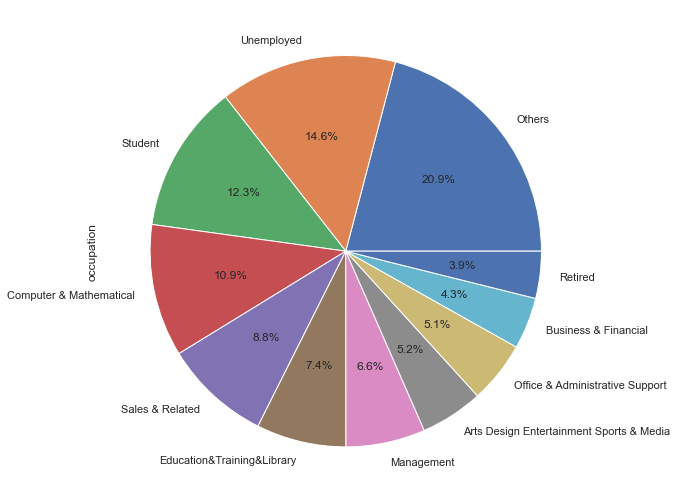

In [798]:
data_train.occupation.value_counts().plot.pie(autopct='%1.1f%%')

# Data Visualization

<AxesSubplot:>

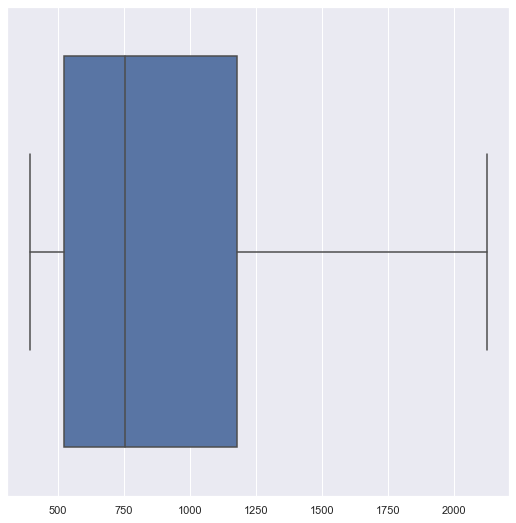

In [652]:
sns.boxplot(x=data_train.occupation.value_counts().values)

<AxesSubplot:>

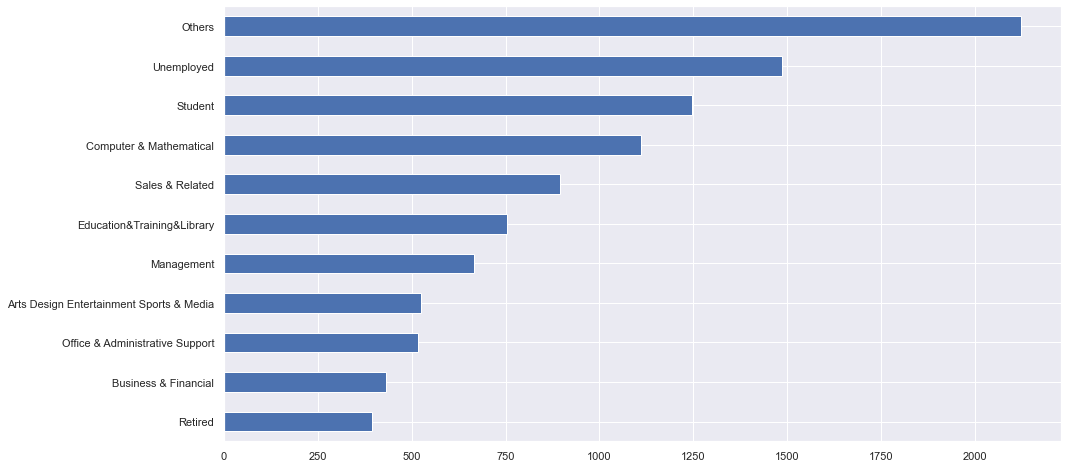

In [653]:
data_train.occupation.value_counts().sort_values().plot.barh(figsize=(15,8))

<AxesSubplot:>

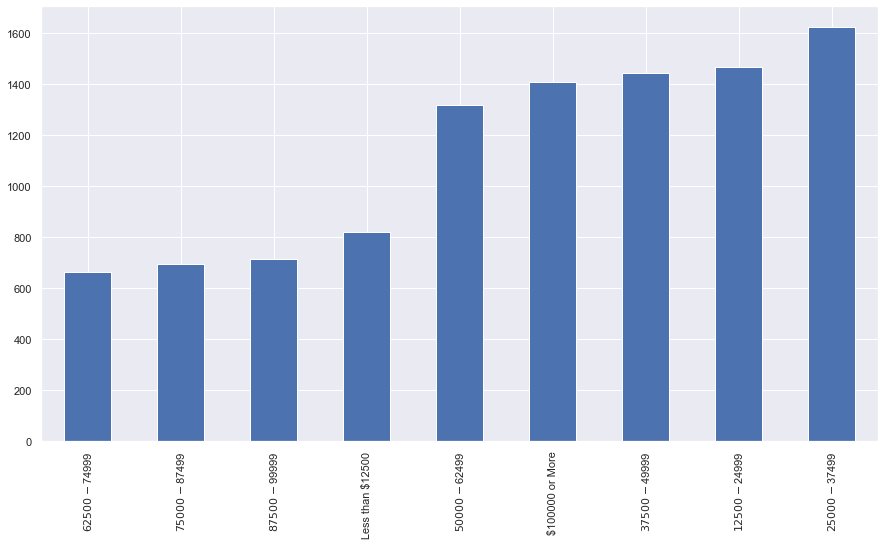

In [654]:
data_train.income.value_counts().sort_values().plot.bar(figsize=(15,8))

<AxesSubplot:>

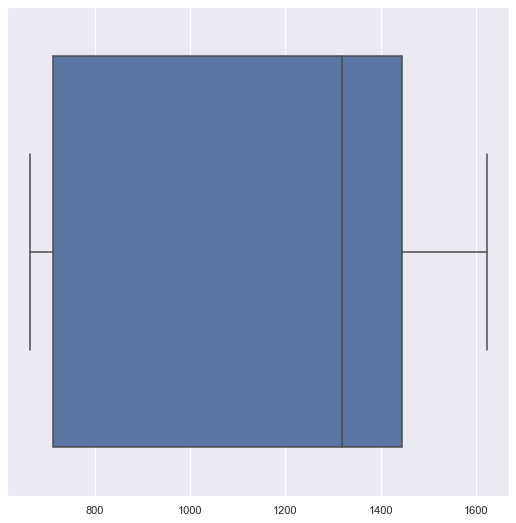

In [655]:
sns.boxplot(x=data_train.income.value_counts().values)

<AxesSubplot:ylabel='Density'>

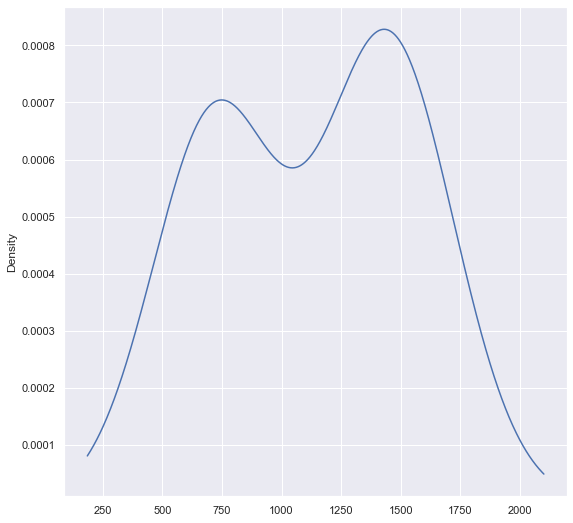

In [656]:
data_train.income.value_counts().plot.kde()

In [657]:
data_train.income.value_counts().skew()

-0.16123089979847438

<AxesSubplot:>

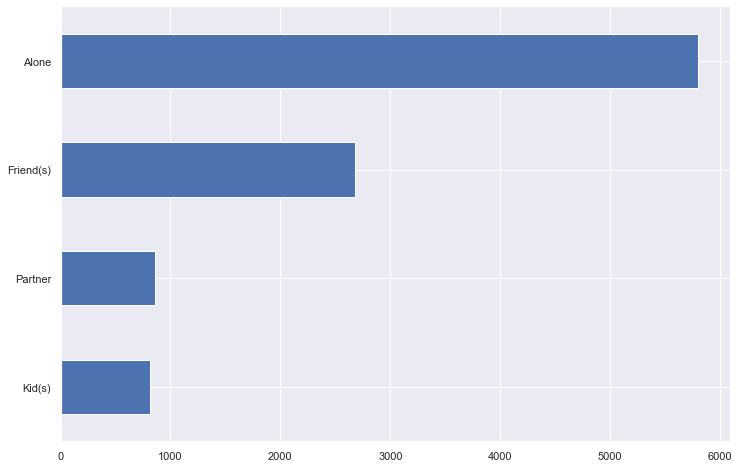

In [658]:
data_train.passanger.value_counts().sort_values().plot.barh(figsize=(12,8))

<AxesSubplot:>

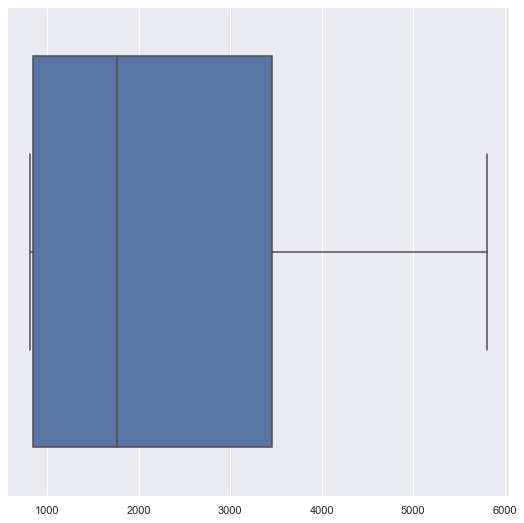

In [659]:
sns.boxplot(x=data_train.passanger.value_counts().values)

In [660]:
data_train.passanger.value_counts().skew()

1.2920385721530778

<AxesSubplot:ylabel='temperature'>

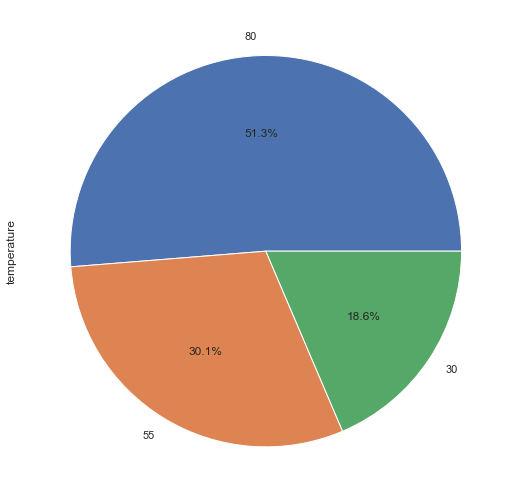

In [661]:
data_train.temperature.value_counts().plot.pie(autopct='%1.1f%%')

In [662]:
data_train.temperature.value_counts().values

array([5203, 3058, 1886], dtype=int64)

<AxesSubplot:ylabel='Density'>

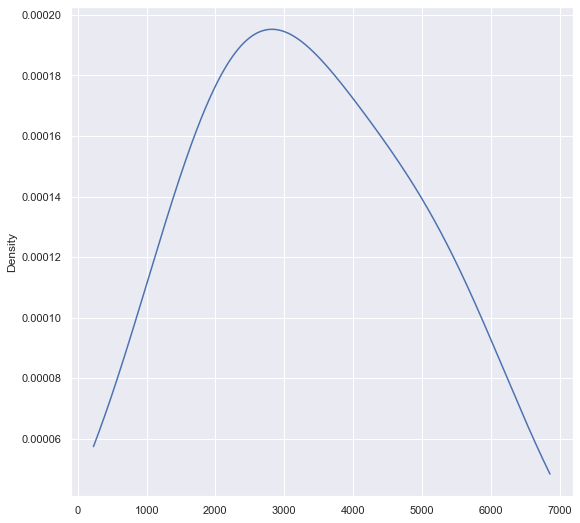

In [663]:
data_train.temperature.value_counts().plot.kde()

In [664]:
data_train.temperature.skew()

-0.633570504945569

<AxesSubplot:ylabel='gender'>

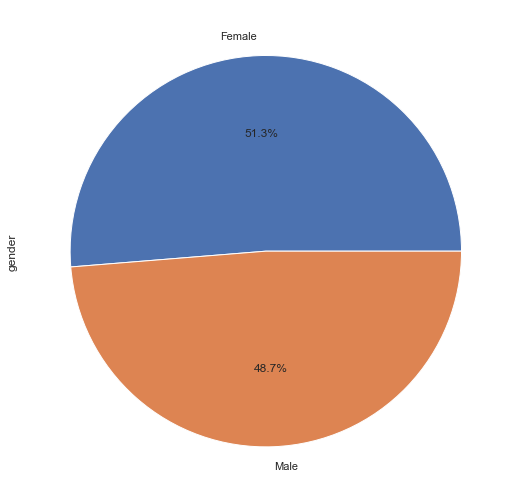

In [665]:
data_train.gender.value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Density'>

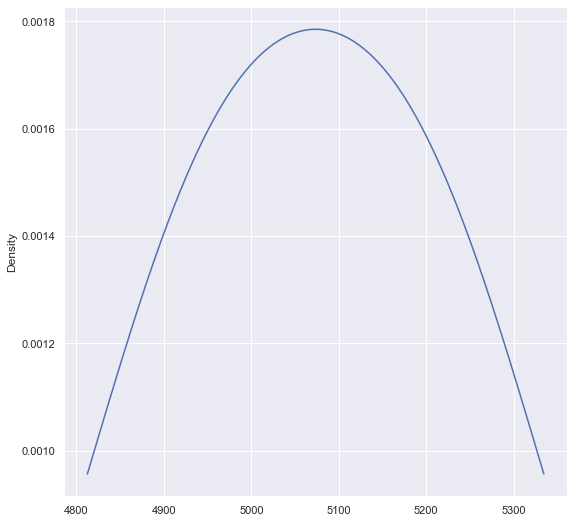

In [666]:
data_train.gender.value_counts().plot.kde()

In [667]:
data_train.coupon.value_counts()

Coffee House             3191
Restaurant(<20)          2233
Carry out & Take away    1923
Bar                      1623
Restaurant(20-50)        1177
Name: coupon, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

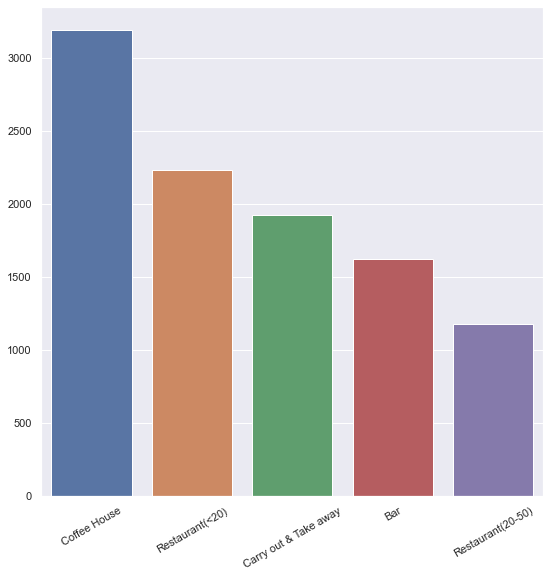

In [668]:
sns.barplot(x=data_train.coupon.value_counts().index,y=data_train.coupon.value_counts().values)
plt.xticks(rotation=30)

<AxesSubplot:ylabel='Density'>

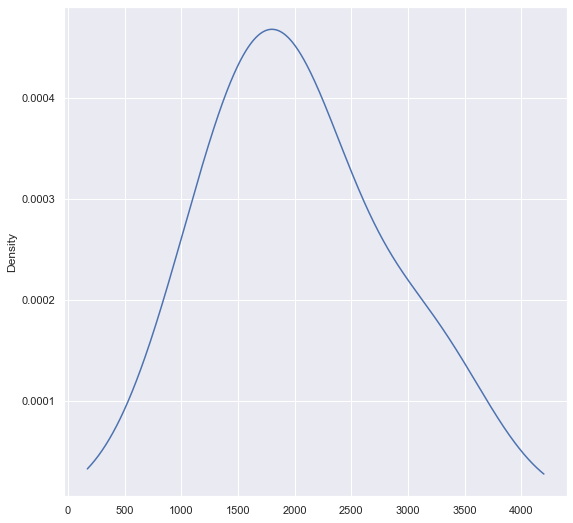

In [669]:
data_train.coupon.value_counts().plot.kde()

In [670]:
data_train.coupon.value_counts().skew()

0.8521476986249793

<AxesSubplot:>

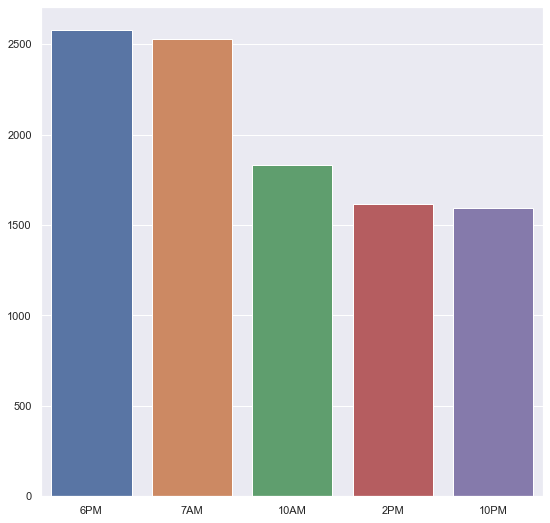

In [671]:
sns.barplot(x=data_train.time.value_counts().index,y=data_train.time.value_counts().values)

<AxesSubplot:ylabel='Density'>

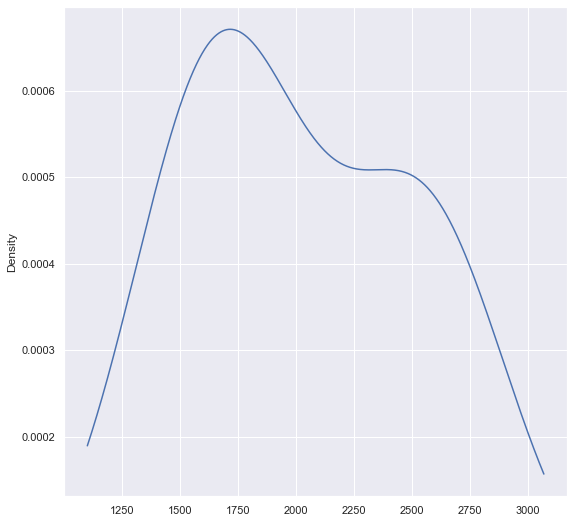

In [672]:
data_train.time.value_counts().plot.kde()

In [673]:
data_train.time.value_counts().skew()

0.4565350284335567

<AxesSubplot:ylabel='Density'>

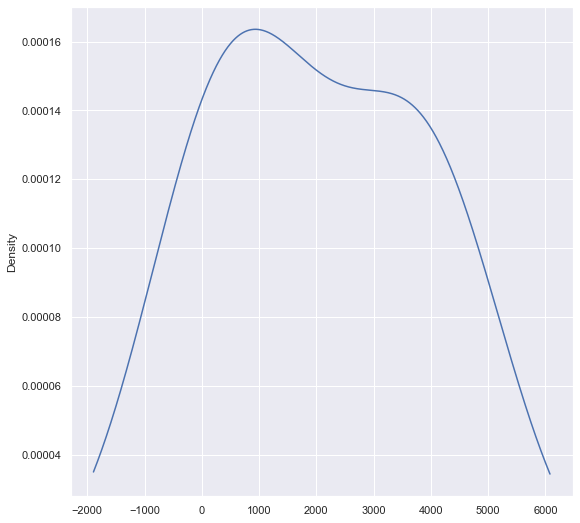

In [674]:
data_train.maritalStatus.value_counts().plot.kde()

<AxesSubplot:>

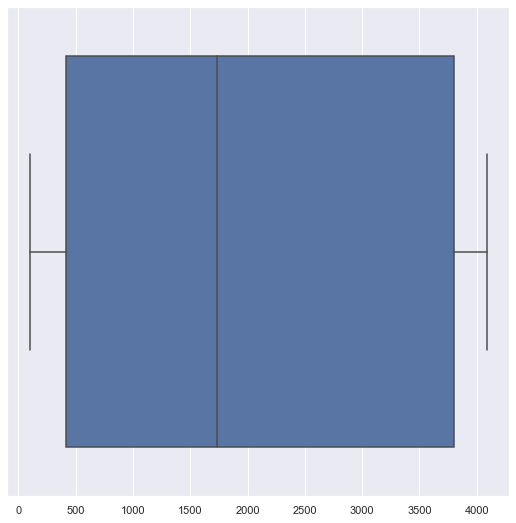

In [675]:
sns.boxplot(x=data_train.maritalStatus.value_counts().values)

<AxesSubplot:>

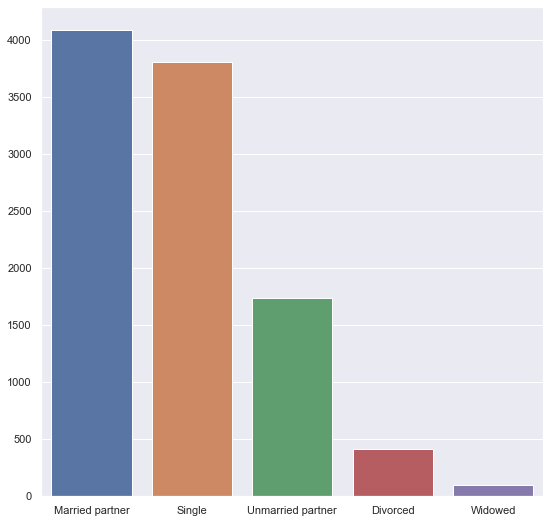

In [676]:
sns.barplot(x=data_train.maritalStatus.value_counts().index,y=data_train.maritalStatus.value_counts().values)

# One Hot Encoding train dataset

In [677]:
# Dropping the target feature and listing the feature columns
data_train_to_be_encoded = data_train.drop(columns=['Y'])
data_train_to_be_encoded.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same'],
      dtype='object')

In [678]:
data_train_encoded = pd.get_dummies(data_train_to_be_encoded)
data_train_encoded.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
customer_id,,,,,,,,,,,,,,,,,,,,,
258868,80,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
318369,80,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
320906,80,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
412393,55,0,1,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
290854,30,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [679]:
data_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10147 entries, 258868 to 431162
Data columns (total 93 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   temperature                                          10147 non-null  int64
 1   has_children                                         10147 non-null  int64
 2   toCoupon_GEQ15min                                    10147 non-null  int64
 3   toCoupon_GEQ25min                                    10147 non-null  int64
 4   direction_same                                       10147 non-null  int64
 5   destination_Home                                     10147 non-null  uint8
 6   destination_No Urgent Place                          10147 non-null  uint8
 7   destination_Work                                     10147 non-null  uint8
 8   passanger_Alone                                      10147 non-null  uint8
 9   

In [680]:
data_train_encoded.shape

(10147, 93)

In [681]:
list(data_train_encoded.columns)

['temperature',
 'has_children',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'destination_Home',
 'destination_No Urgent Place',
 'destination_Work',
 'passanger_Alone',
 'passanger_Friend(s)',
 'passanger_Kid(s)',
 'passanger_Partner',
 'weather_Rainy',
 'weather_Snowy',
 'weather_Sunny',
 'time_10AM',
 'time_10PM',
 'time_2PM',
 'time_6PM',
 'time_7AM',
 'coupon_Bar',
 'coupon_Carry out & Take away',
 'coupon_Coffee House',
 'coupon_Restaurant(20-50)',
 'coupon_Restaurant(<20)',
 'expiration_1d',
 'expiration_2h',
 'gender_Female',
 'gender_Male',
 'age_21',
 'age_26',
 'age_31',
 'age_36',
 'age_41',
 'age_46',
 'age_50plus',
 'age_below21',
 'maritalStatus_Divorced',
 'maritalStatus_Married partner',
 'maritalStatus_Single',
 'maritalStatus_Unmarried partner',
 'maritalStatus_Widowed',
 'education_Associates degree',
 'education_Bachelors degree',
 'education_Graduate degree (Masters or Doctorate)',
 'education_High School Graduate',
 'education_Some High School

In [682]:
data_train_encoded.corr().style.background_gradient()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced


# Understanding test dataset

In [730]:
df_test = pd.read_csv('test.csv')
df_test.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1


In [684]:
df_test.shape

(2537, 26)

In [685]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           2537 non-null   int64 
 1   destination           2537 non-null   object
 2   passanger             2537 non-null   object
 3   weather               2537 non-null   object
 4   temperature           2537 non-null   int64 
 5   time                  2537 non-null   object
 6   coupon                2537 non-null   object
 7   expiration            2537 non-null   object
 8   gender                2537 non-null   object
 9   age                   2537 non-null   object
 10  maritalStatus         2537 non-null   object
 11  has_children          2537 non-null   int64 
 12  education             2537 non-null   object
 13  occupation            2537 non-null   object
 14  income                2537 non-null   object
 15  car                   24 non-null     

In [686]:
df_test.describe()

,customer_id,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
count,2537.000000,2537.000000,2537.000000,2537.0,2537.000000,2537.000000,2537.000000,2537.000000
mean,310920.739062,63.819472,0.420181,1.0,0.555380,0.116279,0.225069,0.774931
std,109337.573114,18.833691,0.493685,0.0,0.497022,0.320622,0.417710,0.417710
min,123567.000000,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,214216.000000,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
50%,311730.000000,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
75%,407664.000000,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000
max,499943.000000,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [687]:
df_test.isnull().sum()

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                       19
CoffeeHouse               45
CarryAway                 29
RestaurantLessThan20      33
Restaurant20To50          41
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

In [688]:
for col in df_test.columns:
    if col != 'customer_id':
        print("=======", col, "=======")
        print(df_test[col].value_counts())

======= destination =======
No Urgent Place    1238
Home                665
Work                634
Name: destination, dtype: int64
======= passanger =======
Alone        1503
Friend(s)     622
Partner       220
Kid(s)        192
Name: passanger, dtype: int64
======= weather =======
Sunny    2054
Snowy     263
Rainy     220
Name: weather, dtype: int64
======= temperature =======
80    1325
55     782
30     430
Name: temperature, dtype: int64
======= time =======
6PM     654
7AM     634
10AM    442
10PM    414
2PM     393
Name: time, dtype: int64
======= coupon =======
Coffee House             805
Restaurant(<20)          553
Carry out & Take away    470
Bar                      394
Restaurant(20-50)        315
Name: coupon, dtype: int64
======= expiration =======
1d    1448
2h    1089
Name: expiration, dtype: int64
======= gender =======
Female    1307
Male      1230
Name: gender, dtype: int64
======= age =======
26         526
21         520
31         403
50plus     357
36         2

In [731]:
# Setting customer_id as index of the dataframe
data_test = df_test.set_index('customer_id')

In [732]:
# Dropping car column as it has 2513 records with Null values
# Dropping direction_opp column as it represents same data as direction_same
# Dropping toCoupon_GEQ5min as it has same value for all rows
data_test.drop(columns=['car','direction_opp','toCoupon_GEQ5min'], inplace=True)

In [733]:
data_test['occupation']=data_test['occupation'].apply(lambda x : 'Others' if x not in important_occupation else x)
data_test.occupation.value_counts()

Others                                      519
Unemployed                                  385
Student                                     339
Computer & Mathematical                     297
Sales & Related                             197
Education&Training&Library                  190
Management                                  173
Office & Administrative Support             122
Business & Financial                        111
Arts Design Entertainment Sports & Media    103
Retired                                     101
Name: occupation, dtype: int64

In [734]:
data_test.shape

(2537, 22)

In [735]:
data_test.isnull().sum()

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     19
CoffeeHouse             45
CarryAway               29
RestaurantLessThan20    33
Restaurant20To50        41
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
dtype: int64

In [736]:
data_test.shape

(2537, 22)

In [737]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 374679 to 467387
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2537 non-null   object
 1   passanger             2537 non-null   object
 2   weather               2537 non-null   object
 3   temperature           2537 non-null   int64 
 4   time                  2537 non-null   object
 5   coupon                2537 non-null   object
 6   expiration            2537 non-null   object
 7   gender                2537 non-null   object
 8   age                   2537 non-null   object
 9   maritalStatus         2537 non-null   object
 10  has_children          2537 non-null   int64 
 11  education             2537 non-null   object
 12  occupation            2537 non-null   object
 13  income                2537 non-null   object
 14  Bar                   2518 non-null   object
 15  CoffeeHouse           2492 non-

# One Hot Encoding test dataset

In [738]:
# Listing the feature columns
data_test.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same'],
      dtype='object')

In [739]:
data_test_encoded = pd.get_dummies(data_test)
data_test_encoded.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
customer_id,,,,,,,,,,,,,,,,,,,,,
374679,80,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
469678,80,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
216140,55,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
184301,80,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
148720,30,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [740]:
data_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 374679 to 467387
Data columns (total 93 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   temperature                                          2537 non-null   int64
 1   has_children                                         2537 non-null   int64
 2   toCoupon_GEQ15min                                    2537 non-null   int64
 3   toCoupon_GEQ25min                                    2537 non-null   int64
 4   direction_same                                       2537 non-null   int64
 5   destination_Home                                     2537 non-null   uint8
 6   destination_No Urgent Place                          2537 non-null   uint8
 7   destination_Work                                     2537 non-null   uint8
 8   passanger_Alone                                      2537 non-null   uint8
 9   p

In [741]:
data_test_encoded.shape

(2537, 93)

In [742]:
list(data_test_encoded.columns)

['temperature',
 'has_children',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'destination_Home',
 'destination_No Urgent Place',
 'destination_Work',
 'passanger_Alone',
 'passanger_Friend(s)',
 'passanger_Kid(s)',
 'passanger_Partner',
 'weather_Rainy',
 'weather_Snowy',
 'weather_Sunny',
 'time_10AM',
 'time_10PM',
 'time_2PM',
 'time_6PM',
 'time_7AM',
 'coupon_Bar',
 'coupon_Carry out & Take away',
 'coupon_Coffee House',
 'coupon_Restaurant(20-50)',
 'coupon_Restaurant(<20)',
 'expiration_1d',
 'expiration_2h',
 'gender_Female',
 'gender_Male',
 'age_21',
 'age_26',
 'age_31',
 'age_36',
 'age_41',
 'age_46',
 'age_50plus',
 'age_below21',
 'maritalStatus_Divorced',
 'maritalStatus_Married partner',
 'maritalStatus_Single',
 'maritalStatus_Unmarried partner',
 'maritalStatus_Widowed',
 'education_Associates degree',
 'education_Bachelors degree',
 'education_Graduate degree (Masters or Doctorate)',
 'education_High School Graduate',
 'education_Some High School

# Logistic Regression

In [700]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [701]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [702]:
X.shape

(10147, 93)

In [703]:
y.shape

(10147,)

In [704]:
logreg = LogisticRegression()

In [705]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 110, stratify = y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.6960977532518723


array([[ 646,  449],
       [ 322, 1120]], dtype=int64)

# Decision Tree

In [706]:
from sklearn.tree import DecisionTreeClassifier

In [707]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [708]:
dtclf = DecisionTreeClassifier(criterion='gini', max_depth = 58, random_state = 100)
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 110, stratify = y)
dtclf.fit(X_train, y_train)
pd.Series(dtclf.feature_importances_, index = data_train_encoded.columns).sort_values(ascending = False)

coupon_Restaurant(<20)          0.034461
CoffeeHouse_never               0.029160
coupon_Carry out & Take away    0.027086
expiration_2h                   0.026376
Bar_never                       0.024222
                                  ...   
Bar_gt8                         0.002348
Restaurant20To50_gt8            0.002281
maritalStatus_Widowed           0.001349
CarryAway_never                 0.001002
education_Some High School      0.000832
Length: 93, dtype: float64

In [709]:
y_pred = dtclf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.6905794245171463


array([[ 716,  379],
       [ 406, 1036]], dtype=int64)

In [710]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth = 58, random_state = 85)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 110, stratify = y)
dtclf.fit(X_train, y_train)
pd.Series(dtclf.feature_importances_, index = data_train_encoded.columns).sort_values(ascending = False)

coupon_Restaurant(<20)          0.025397
CoffeeHouse_never               0.023995
expiration_1d                   0.022889
coupon_Carry out & Take away    0.020681
Bar_never                       0.020228
                                  ...   
Restaurant20To50_gt8            0.002969
occupation_Retired              0.002839
CarryAway_never                 0.001724
education_Some High School      0.000843
maritalStatus_Widowed           0.000368
Length: 93, dtype: float64

In [711]:
y_pred = dtclf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.6799369333858889


array([[ 687,  408],
       [ 404, 1038]], dtype=int64)

# Random Forest

In [712]:
from sklearn.ensemble import RandomForestClassifier

In [713]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [714]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 150, stratify = y)

train_acc = []
test_acc = []
train_acc_e = []
test_acc_e = []

for n in range(1,200):
    rndfor = RandomForestClassifier(criterion='gini',
                                 n_estimators=n,
                                 random_state=110,
                                 n_jobs=2)
    rndfor.fit(X_train, y_train)
    train_acc.append(rndfor.score(X_train, y_train))
    test_acc.append(rndfor.score(X_test, y_test))
    
for n in range(1,300):
    rndfore = RandomForestClassifier(criterion='entropy',
                                 n_estimators=n,
                                 random_state=110,
                                 n_jobs=2)
    rndfore.fit(X_train, y_train)
    train_acc_e.append(rndfore.score(X_train, y_train))
    test_acc_e.append(rndfore.score(X_test, y_test))

In [715]:
train_acc

[0.8614980289093298,
 0.859526938239159,
 0.9358738501971091,
 0.9434954007884363,
 0.9649145860709593,
 0.9675427069645204,
 0.9780551905387648,
 0.9810775295663601,
 0.9840998685939554,
 0.9876478318002628,
 0.9885676741130092,
 0.9913272010512484,
 0.9919842312746386,
 0.9939553219448095,
 0.9938239159001314,
 0.99526938239159,
 0.9959264126149803,
 0.9961892247043364,
 0.9964520367936925,
 0.997766097240473,
 0.9971090670170828,
 0.997766097240473,
 0.9978975032851511,
 0.9978975032851511,
 0.997766097240473,
 0.997766097240473,
 0.9981603153745072,
 0.9985545335085414,
 0.9984231274638633,
 0.9984231274638633,
 0.9985545335085414,
 0.9986859395532195,
 0.9986859395532195,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,
 0.9988173455978975,

In [716]:
print(max(test_acc))
print(test_acc.index(max(test_acc)))
print(max(test_acc_e))
print(test_acc_e.index(max(test_acc_e)))

0.7658651951123374
194
0.7654710287741426
197


[]

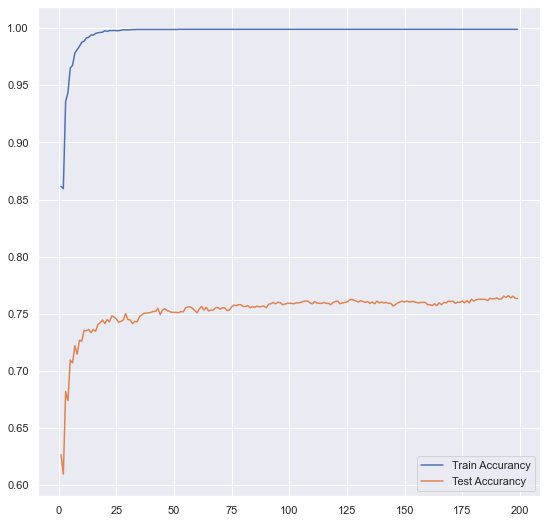

In [724]:
plt.plot(range(1,200), train_acc, label="Train Accurancy")
plt.plot(range(1,200), test_acc, label="Test Accurancy")
plt.legend()
plt.plot()

[]

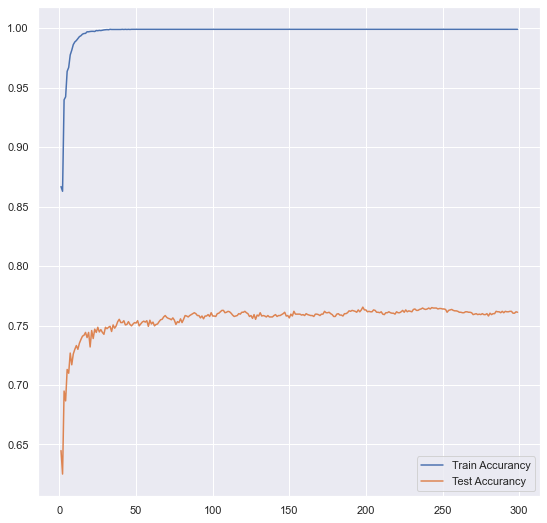

In [725]:
plt.plot(range(1,300), train_acc_e, label="Train Accurancy")
plt.plot(range(1,300), test_acc_e, label="Test Accurancy")
plt.legend()
plt.plot()

In [743]:
X_train = X
y_train = y

In [744]:
X.shape

(10147, 93)

In [745]:
y.shape

(10147,)

In [746]:
rndfor = RandomForestClassifier(criterion='gini',
                                 n_estimators=194,
                                 random_state=110,
                                 n_jobs=2)
rndfor.fit(X_train, y_train)
X_test = data_test_encoded
X_test.shape

(2537, 93)

In [747]:
y_pred = rndfor.predict(X_test)
y_pred.shape

(2537,)

In [748]:
final_predicted_data = pd.DataFrame()
final_predicted_data['customer_id'] = X_test.index
final_predicted_data['Y'] = y_pred
final_predicted_data.head()

,customer_id,Y
0,374679,1
1,469678,1
2,216140,0
3,184301,0
4,148720,1


In [749]:
final_predicted_data.to_csv("AI_Wizards_predicted_data_RF_G.csv", index = False)

# Gradient Boost

In [750]:
from sklearn.ensemble import GradientBoostingClassifier
from numpy import arange

In [751]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [752]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 150, stratify = y)

for n in arange(0.1,0.5,0.1):
    grdbst = GradientBoostingClassifier(learning_rate=n, n_estimators=999,random_state=96)
    grdbst.fit(X_train, y_train)
    y_pred = grdbst.predict(X_test)
    print(accuracy_score(y_test, y_pred), n)

0.7611351990540007 0.1
0.762317698068585 0.2
0.7591643673630272 0.30000000000000004
0.7599527000394166 0.4


In [753]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [754]:
X.shape

(10147, 93)

In [755]:
y.shape

(10147,)

In [756]:
X_test.shape

(2537, 93)

In [757]:
y_test.shape

(2537,)

In [780]:
#grdbst = GradientBoostingClassifier(learning_rate=0.4, n_estimators=996)
grdbst = GradientBoostingClassifier(learning_rate=0.2, n_estimators=999,random_state=96)
#grdbst = GradientBoostingClassifier(learning_rate=0.2, n_estimators=998)
X_train = X.copy()
y_train = y.copy()
grdbst.fit(X_train, y_train)
X_test = data_test_encoded
X_test.shape

(2537, 93)

In [759]:
y_pred = grdbst.predict(X_test)
y_pred.shape

(2537,)

In [781]:
final_predicted_data = pd.DataFrame()
final_predicted_data['customer_id'] = X_test.index
final_predicted_data['Y'] = y_pred
final_predicted_data.head()

,customer_id,Y
0,374679,1
1,469678,1
2,216140,1
3,184301,1
4,148720,1


In [782]:
final_predicted_data.to_csv("AI_Wizards_predicted_data_GB.csv", index = False)

# Naive Bayes

In [762]:
from sklearn.naive_bayes import BernoulliNB

In [763]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [764]:
nb = BernoulliNB()

In [765]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 150, stratify = y)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.6614111154907371


array([[ 670,  425],
       [ 434, 1008]], dtype=int64)

# K Neighbors Classifier

In [766]:
from sklearn.neighbors import KNeighborsClassifier

In [767]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [768]:
X.shape

(10147, 93)

In [769]:
y.shape

(10147,)

In [770]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 150, stratify = y)

train_acc = []
test_acc = []

for n in range(1,20):
    knc = KNeighborsClassifier(n_neighbors = n)
    knc.fit(X_train, y_train)
    train_acc.append(knc.score(X_train, y_train))
    test_acc.append(knc.score(X_test, y_test))

[]

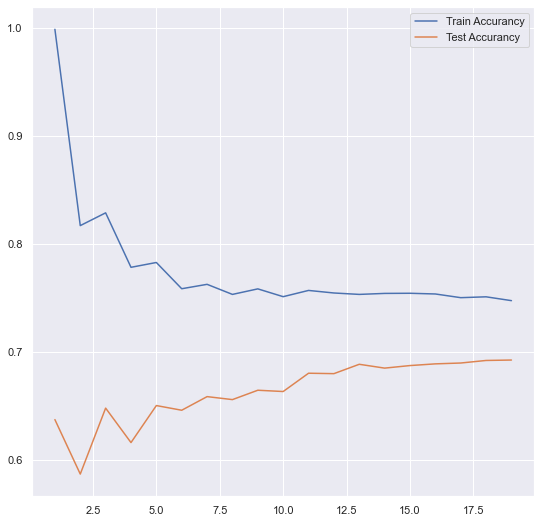

In [771]:
plt.plot(range(1,20), train_acc, label="Train Accurancy")
plt.plot(range(1,20), test_acc, label="Test Accurancy")
plt.legend()
plt.plot()

In [772]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()
knc = KNeighborsClassifier(n_neighbors = 3)
X_train = X
y_train = y
knc.fit(X_train, y_train)
X_test = data_test_encoded
y_pred = knc.predict(X_test)

In [773]:
X_train.shape

(10147, 93)

In [774]:
y.shape

(10147,)

# SVM

In [775]:
from sklearn.svm import SVC

In [776]:
X = data_train_encoded.copy()
y = data_train['Y'].copy()

In [777]:
svc = SVC()

In [778]:
# Testing out the model
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 56, stratify = y)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(svc.score(X_test, y_pred))
confusion_matrix(y_test, y_pred)

0.5683878596767836
1.0


array([[   0, 1095],
       [   0, 1442]], dtype=int64)

# Final Model Seclection

# Based on all the test, Gradient Boost gave the best accuracy score, so we select it 